# **CartoCell - Training workflow (Phase 2)**
___  
  
**CartoCell** is a deep learning-based image processing pipeline for the high-throughput segmentation of whole epithelial cysts acquired at low resolution with minimal human intervention. The official documentation of the workflow is in [CartoCell tutorial](https://biapy.readthedocs.io/en/latest/tutorials/cartocell.html). 

<figure>
<center>
<img src='https://biapy.readthedocs.io/en/latest/_images/cartocell_pipeline.png' width='800px'/>
<figcaption><b>Figure 1</b>: CartoCell processing phases (from Andrés-San Román et al., 2022).</figcaption></center>
</figure>


**This notebook replicates CartoCell's Phase 2**, i.e., it allows the segmentation of 3D epithelial cysts by training a deep learning model on a small dataset of low-resolution images (see Figure 1, Phase 2, model M1).

___


**CartoCell** relies on the [BiaPy library](https://github.com/danifranco/BiaPy), freely available in GitHub: https://github.com/danifranco/BiaPy

Please note that **CartoCell** is based on a publication. If you use it successfully for your research please be so kind to cite our work:
 
*''CartoCell, a high-throughput pipeline for accurate 3D image analysis, unveils cell morphology patterns in epithelial cysts''. Jesús A. Andrés-San Román, Carmen Gordillo-Vázquez, Daniel Franco-Barranco, Laura Morato, Antonio Tagua, Pablo Vicente-Munuera, Ana M. Palacios, María P. Gavilán, Valentina Annese, Pedro Gómez-Gálvez, Ignacio Arganda-Carreras, Luis M. Escudero. [under revision]*


___


## **Expected inputs and outputs**
___
**Inputs**

This notebook expects five folders as input:
* **Training raw images**: with the raw 3D TIFF images to train the model. A cyst per image is expected. 
* **Training label images**: with the label 3D TIFF images (annotated cell instances) to train the model. Their names and sizes must match those of the training raw images.
* **Validation raw images**: with the raw 3D TIFF images to validate the model. A cyst per image is expected. 
* **Validation label images**: with the label 3D TIFF images (annotated cell instances) to validate the model. Their names and sizes must match those of the validation raw images.
* **Output folder**: a path to store the segmentation results.

**Outputs**

If the execution is successful, two folders will be created **for each input validation image** containing:
* A **TIFF image** with the cell instances before 3D Voronoi post-processing.
* A **TIFF image** with the cell instances after 3D Voronoi post-processing.



<figure>
<center>
<img src='https://biapy.readthedocs.io/en/latest/_images/cyst_sample.gif' width='300'/>
<img src='https://biapy.readthedocs.io/en/latest/_images/cyst_instance_prediction.gif' width='300'/>
<figcaption><b>Figure 2</b>: Example of input and output images. From left to rigth: 3D TIFF input image and the resulting TIFF image with the cell instances after Voronoi post-processing</figcaption></center>
</figure>


<font color='red'><b>Note</b></font>: for testing purposes, you can also run this notebook with the samples images provided in *Manage file(s) source > Option 3*.






## **Prepare the environment**
___

Establish connection with Google services. You **must be logged in to Google** to continue.
Since this is not Google's own code, you will probably see a message warning you of the dangers of running unfamiliar code. This is completely normal.


## **Manage file(s) source**
---
The input folder can be provided using three different options: by directly uploading the folder (option 1), by using a folder stored in Google Drive (option 2) or by using a few samples of our data (option 3).

Depending on the option chosen, different steps will have to be taken, as explained in the following cells.


### **Option 1: use your local files and upload them to the notebook**
---
You will be prompted to upload your files to Colab and they will be stored under `/content/input/`.

In [ ]:
#@markdown ##Play the cell to upload local files (train raw images)
#@markdown You can use [training_down-sampled_raw_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-dd7044fc-dda2-43a2-9951-cbe6c1851030) here.
from google.colab import files
!mkdir -p /content/input/train/x
%cd /content/input/train/x
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (train label images)
#@markdown You can use [training_down-sampled_label_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-3e5dded7-24c6-41e3-ab6d-9ca3587c0fbe) here.

from google.colab import files
!mkdir -p /content/input/train/y 
%cd /content/input/train/y
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (validation raw images)
#@markdown You can use [validation_dataset_raw_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-83538c77-61d8-4770-85d1-1bac988c5e43) here.

from google.colab import files
!mkdir -p /content/input/val/x
%cd /content/input/val/x
uploaded = files.upload()
%cd /content

In [ ]:
#@markdown ##Play the cell to upload local files (validation label images)
#@markdown You can use [validation_dataset_label_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-5195c7ac-eacd-491e-9d69-8115b36b6c43) here. 

from google.colab import files
!mkdir -p /content/input/val/y
%cd /content/input/val/y
uploaded = files.upload()
%cd /content

### **Option 2: mount your Google Drive**
---
To use this notebook on your own data from Google Drive, you need to mount Google Drive first.

Play the cell below to mount your Google Drive and follow the link that will be shown. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Option 3: download a few of our samples**
---
If you do not have data at hand but would like to test the notebook, no worries! You can run the following cell to download a subset of our cyst samples and continue with rest of the notebook.

In [ ]:
#@markdown ##Play to download our data samples
#@markdown Training data downloaded will be [training_down-sampled_raw_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-dd7044fc-dda2-43a2-9951-cbe6c1851030) path and [training_down-sampled_label_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-3e5dded7-24c6-41e3-ab6d-9ca3587c0fbe). 
#@markdown Validation data downloaded will be [validation_dataset_raw_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-83538c77-61d8-4770-85d1-1bac988c5e43) path and [validation_dataset_label_images](https://data.mendeley.com/v1/datasets/7gbkxgngpm/draft#folder-5195c7ac-eacd-491e-9d69-8115b36b6c43). 

import os 

fnamex = "/content/train_x.zip"
fnamey = "/content/train_y.zip"
fnamevx = "/content/val_x.zip"
fnamevy = "/content/val_y.zip"

!mkdir -p /content/input/train
!mkdir -p /content/input/val

%cd /content 
if not os.path.exists(fnamex) or  not os.path.exists(fnamey):
    !pip install --upgrade --no-cache-dir gdown &> /dev/null
    !gdown --id 12z6gyxH6Bb5RRr2U0XGQq9cJmHrX7L4V &> /dev/null
    !gdown --id 1G1XNtwzlmsQjVCjpvvPianxTtXgPeeZX &> /dev/null
    !gdown --id 1rH0lUQ70g5kfL81_QNjrn30KP1vXe0mZ &> /dev/null
    !gdown --id 1AAkBh_S0MduSBCF0dtQaJl_XOWYMADFe &> /dev/null
    %cd /content/input/train
    !unzip {fnamex}
    !unzip {fnamey}
    %cd /content/input/val
    !unzip {fnamevx}
    !unzip {fnamevy}
%cd /content



/content
/content/input/train
Archive:  /content/train_x.zip
   creating: x/
  inflating: x/cyst 7d filt 2 pocillo bcat 1 100 dapi 15.07.19 3a 40x 2.5Z.tif  
  inflating: x/Cyst 7d filt 2po Pha,Bcat,DAPI 17.07.19 40x Z5 9a.tif  
  inflating: x/Cyst 4d filt 2po Pha,Bcat,DAPI 02.08.19 40x POC 3 Z6.tif  
  inflating: x/cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z5 14a.tif  
  inflating: x/Cyst 7d filt 3po Pha,Bcat,DAPI 15.07.19 40x Z4.5 8a.tif  
  inflating: x/Cyst 7d filt 3po Pha,Bcat,DAPI 15.07.19 40x Z5 11a.tif  
  inflating: x/Cyst 4d filt 2po Pha,Bcat,DAPI 02.08.19 40x Z5 6a.tif  
  inflating: x/cyst 7d filt 2po pha bcat dapi 15.07.19 40x z4 7a.tif  
  inflating: x/cyst 7d 3po pha bcat1 200 dapi 15.07.19 40x z4.5 1a.tif  
  inflating: x/Cyst 7d filt 3po Pha,Bcat,DAPI 15.07.19 40x Z4.5 10a.tif  
  inflating: x/cyst 4d fil 3well Pha,bcat,dapi 02.08.19 40x Z6 15a.tif  
  inflating: x/Cyst 7d filt 2po Pha,Bcat,DAPI 17.07.19 40x Z5 10a.tif  
  inflating: x/cyst 7 days filt 3 pocillo bca


## **Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

Go to **Runtime -> Change the Runtime type**

**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

**Accelerator: GPU** *(Graphics processing unit)*

## **Paths to load input images and save output files**
___

If option 1 (uploading the folder) or option 3 (downloading our prepared data samples) were chosen, define train_data_path as '/content/input/train/x', train_data_mask_path as '/content/input/train/y', val_data_path as '/content/input/val/x', val_data_mask_path as '/content/input/val/y', and output_path as '/content/out'. Please make sure you download the results from the '/content/out' folder later!

If option 2 is chosen, introduce here the paths to your input files and to the folder where you want to store the results. E.g. '/content/gdrive/MyDrive/...'.

In case you have troubles finding the path to your folders, at the top left of this notebook you will find a small folder icon. Explore until you find the folders. There you can copy the folder path by right clicking and clicking "copy".

In [ ]:
#@markdown #####Path to train images
train_data_path = '/content/input/train/x' #@param {type:"string"}
#@markdown #####Path to train instances
train_data_mask_path = '/content/input/train/y' #@param {type:"string"}
#@markdown #####Path to train images
val_data_path = '/content/input/val/x' #@param {type:"string"}
#@markdown #####Path to train instances
val_data_mask_path = '/content/input/val/y' #@param {type:"string"}
#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/output' #@param {type:"string"}

## **Install BiaPy library**


In [ ]:
#@markdown ##Play to install BiaPy and its dependences

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms                                                                           

# Clone the repo
%cd /content/ 
if not os.path.exists('BiaPy'):
    !git clone https://github.com/danifranco/BiaPy.git
    !git checkout a19de119e33d1ce6769e82aa592492ef33b00611 &> /dev/null
    !pip install --upgrade --no-cache-dir gdown &> /dev/null
    sys.path.insert(0, 'BiaPy')
    %cd /content/BiaPy
    
    # Install dependencies 
    !pip install git+https://github.com/aleju/imgaug.git &> /dev/null
    !pip install numpy_indexed yacs &> /dev/null

/content
Cloning into 'BiaPy'...
remote: Enumerating objects: 15101, done.
remote: Counting objects: 100% (1170/1170), done.
remote: Compressing objects: 100% (332/332), done.
remote: Total 15101 (delta 831), reused 1163 (delta 827), pack-reused 13931
Receiving objects: 100% (15101/15101), 816.66 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (8100/8100), done.
/content/BiaPy


## **Train the model (Phase 2)**


In [ ]:
#@markdown ##Play to download the YAML configuration file and update it to train the model
import errno

job_name = "cartocell_training"

# Download .yaml file 
%cd /content/
!gdown --id 1_GroMaYAJsZNv02OJN6mAwcg_f-X75Ul &> /dev/null

# Check folders before modifying the .yaml file
if not os.path.exists(train_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_path)
ids = sorted(next(os.walk(train_data_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(train_data_path))
if not os.path.exists(train_data_mask_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), train_data_mask_path)
ids = sorted(next(os.walk(train_data_mask_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(train_data_mask_path))

# Check folders before modifying the .yaml file
if not os.path.exists(val_data_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), val_data_path)
ids = sorted(next(os.walk(val_data_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(val_data_path))
if not os.path.exists(val_data_mask_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), val_data_mask_path)
ids = sorted(next(os.walk(val_data_mask_path))[2])
if len(ids) == 0:
    raise ValueError("No images found in dir {}".format(val_data_mask_path))


# Modify template according to defined variable paths
import fileinput

for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
    if 'edit_trainx_path_here' in line:
        print('        PATH: {}'.format(train_data_path)) 
    elif 'edit_trainy_path_here' in line:
        print('        MASK_PATH: {}'.format(train_data_mask_path)) 
    elif 'edit_valx_path_here' in line:
        print('        PATH: {}'.format(val_data_path)) 
    elif 'edit_valy_path_here' in line:   
        print('        MASK_PATH: {}'.format(val_data_mask_path)) 
    else:
        print('{}'.format(line), end='')

import yaml
with open("/content/"+str(job_name)+".yaml", 'r') as stream:
    try:
        biapy_config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

/content


In [ ]:
#@markdown ##Play to pass images through the model
#@markdown We set 50 epochs to train here due to Colab restrictions but the original was trained setting epochs to 1300.

import os
import errno

# Run the code 
%cd '/content/BiaPy'
!python -u main.py --config '/content/'{job_name}'.yaml' --result_dir {output_path} --name {job_name} --run_id 1 --gpu 0



/content/BiaPy
Date: 2022-11-22 11:35:20
Arguments: Namespace(config='/content/cartocell_training.yaml', gpu='0', name='cartocell_training', result_dir='/content/output', run_id=1)
Job: cartocell_training_1
Python       : 3.7.15 (default, Oct 12 2022, 19:14:55) 
Keras        : 2.9.0
Tensorflow   : 2.9.2
Num GPUs Available:  1
Python process limited to 1 thread
Configuration details:
AUGMENTOR:
  AFFINE_MODE: constant
  AUG_NUM_SAMPLES: 10
  AUG_SAMPLES: True
  BRIGHTNESS: True
  BRIGHTNESS_EM: False
  BRIGHTNESS_EM_FACTOR: (-0.1, 0.1)
  BRIGHTNESS_EM_MODE: 3D
  BRIGHTNESS_FACTOR: (0.1, 0.15)
  BRIGHTNESS_MODE: 3D
  CBLUR_DOWN_RANGE: (2, 8)
  CBLUR_INSIDE: True
  CBLUR_SIZE: (0.2, 0.4)
  CHANNEL_SHUFFLE: False
  CMIX_SIZE: (0.2, 0.4)
  CNOISE_NB_ITERATIONS: (1, 3)
  CNOISE_SCALE: (0.05, 0.1)
  CNOISE_SIZE: (0.2, 0.4)
  CONTRAST: False
  CONTRAST_EM: False
  CONTRAST_EM_FACTOR: (-0.1, 0.1)
  CONTRAST_EM_MODE: 3D
  CONTRAST_FACTOR: (-0.1, 0.1)
  CONTRAST_MODE: 3D
  COUT_APPLY_TO_MASK: Fal

## Inspection of the loss function and the Intersection over Union (IoU)
---

First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

The **Jaccard index or Intersection over Union** (IoU) metric is a method that can be used to quantify the overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict cells.

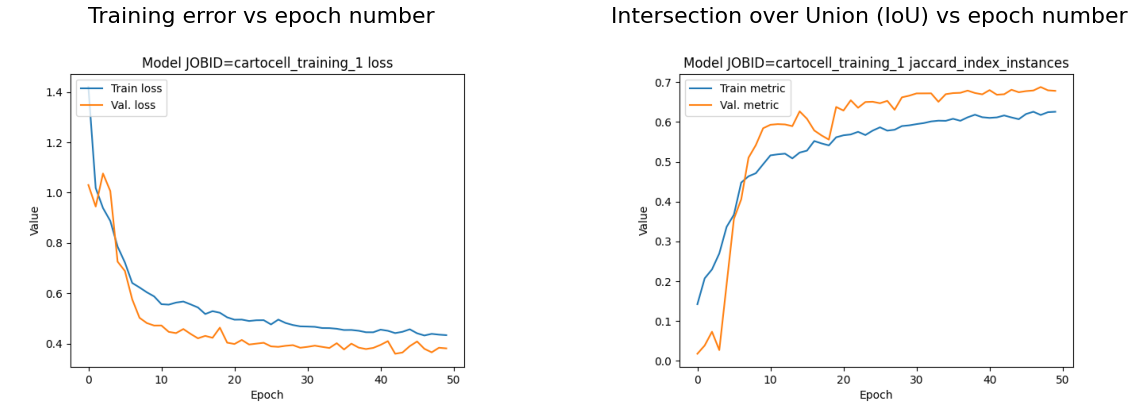

In [ ]:
#@markdown ##Play the cell to show a plot of training error vs. epoch number and IoU vs epoch number

loss_plot = imread( output_path + '/cartocell_training/results/cartocell_training_1/charts/cartocell_training_1_loss.png' )

iou_plot = imread( output_path + '/cartocell_training/results/cartocell_training_1/charts/cartocell_training_1_jaccard_index_instances.png' )

fig = plt.figure( figsize = (20,10))
ax1 = plt.subplot( 1, 2, 1 )
_ = plt.imshow( loss_plot )
_ = plt.axis('off')
ax1.set_title( 'Training error vs epoch number', fontdict = {'fontsize':22})

ax2 = plt.subplot( 1, 2, 2 )
_ = plt.imshow( iou_plot )
_ = plt.axis('off')
_= ax2.set_title( 'Intersection over Union (IoU) vs epoch number', fontdict = {'fontsize':22})

## **Visualize 3D instance segmentation results**


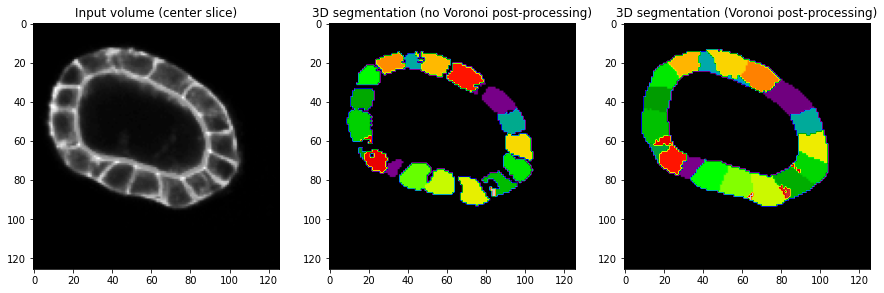

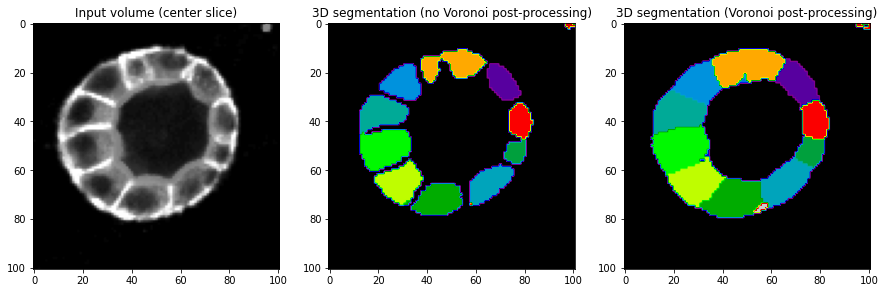

In [ ]:
final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")

instance_results = os.path.join(final_results, "per_image_instances")
voronoi_results = os.path.join(final_results, "per_image_instances_voronoi")

#@markdown ##Play to visualize some results
from IPython.display import Markdown as md
md("After this last step, the resulting images should be placed in {}".format(final_results))
# Show a few examples to check that they have been stored correctly 
%matplotlib inline
import matplotlib
from numpy.random import randint, seed
from matplotlib import pyplot as plt

ids = sorted(next(os.walk(instance_results))[2])
ids_vor = sorted(next(os.walk(voronoi_results))[2])

# cmap = plt.cm.prism
# cmaplist = [cmap(i) for i in range(cmap.N)]
# cmaplist[0] = (0,0,0,1)
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('mcm', cmaplist, cmap.N)

samples_to_show = min(len(ids), 3)
choosen_images = np.random.choice(len(ids), samples_to_show, replace=False) 
seed(1)

test_samples = []
test_sample_preds = []
test_sample_vor = []

for i in range(len(choosen_images)):
    aux = imread(os.path.join(val_data_path, ids[choosen_images[i]]))
    sl = int(len(aux)/2)
    test_samples.append(aux[sl])
    aux = imread(os.path.join(instance_results, ids[choosen_images[i]]))[sl].astype(np.uint64)
    if np.max(aux)**2 < np.iinfo(aux.dtype).max: aux = aux**2
    test_sample_preds.append(aux)
    aux = imread(os.path.join(voronoi_results, ids_vor[choosen_images[i]]))[sl].astype(np.uint64)
    if np.max(aux)**2 < np.iinfo(aux.dtype).max: aux = aux**2
    test_sample_vor.append(aux)

# Show predicted images
for j in range(samples_to_show):
    plt.figure(figsize=(15,15))
    for i in range(3):
        plt.subplot(j+1, 3, i+1)
        if i == 0:
            plt.title("Input volume (center slice)")
            plt.imshow(test_samples[j], cmap='gray')          
        elif i == 1:
            plt.title("3D segmentation (no Voronoi post-processing)")
            plt.imshow(test_sample_preds[j], cmap="nipy_spectral")        
        else:
            plt.title("3D segmentation (Voronoi post-processing)")
            plt.imshow(test_sample_vor[j], cmap="nipy_spectral")
    plt.show()


In [ ]:
#@markdown ###Play to display the path to the output files (one 3D TIFF label image for each input image).

final_results = os.path.join(output_path, job_name, 'results', job_name+"_1")

instance_results = os.path.join(final_results, "per_image_instances")
voronoi_results = os.path.join(final_results, "per_image_instances_voronoi")

peak_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_local_max_check')
print("Output paths:")
print("    Instance segmentation files before Voronoi post-processing are in {}".format(instance_results))
print("    Instance segmentation files after Voronoi post-processing are in {}".format(voronoi_results))

Output paths:
    Instance segmentation files before Voronoi post-processing are in /content/output/cartocell_training/results/cartocell_training_1/per_image_instances
    Instance segmentation files after Voronoi post-processing are in /content/output/cartocell_training/results/cartocell_training_1/per_image_instances_voronoi
